In [24]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [100]:
crimes = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv')
population = pd.read_csv('data/Population_by_Borough_NYC.csv')
census = pd.read_csv('data/nyc_census_tracts.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [8]:
population.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%


In [9]:
census.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


1117 types of crimes


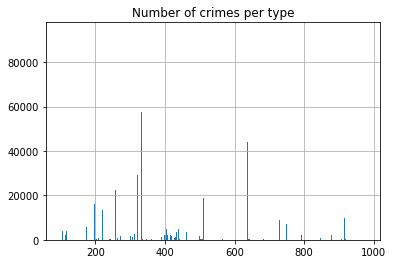

In [25]:
crimes[['PD_CD', 'PD_DESC']] # Crime type + description of type of offens
print("{} types of crimes".format(len(set(crimes['PD_CD']))))
plt.title("Number of crimes per type")
crimes['PD_CD'].hist(bins=len(set(crimes['PD_CD'])))

In [73]:
"""
Some dates were mistakenly registered in 1015. Those crimes probably happened in 2015
Let's drop them
"""
for elem in set(crimes['CMPLNT_FR_DT']):
    try:
        pd.to_datetime(elem)
    except:
        print(elem)
        
crimes = crimes[~ crimes['CMPLNT_FR_DT'].str.contains('1015').fillna(False)]

10/17/1015
09/16/1015
09/26/1015
10/27/1015
12/04/1015
11/25/1015


In [74]:
# Let's create a timestamp
crimes['Timestamp'] = pd.to_datetime(crimes['CMPLNT_FR_DT'] + ' ' + crimes['CMPLNT_FR_TM'], format="%m/%d/%Y %H:%M:%S")

In [92]:
# Description says crime report goes back 5 years let's only keep those values

print(crimes['Timestamp'].min(), crimes['Timestamp'].max())
crimes = crimes[crimes['Timestamp'] >= '01/01/2011']

2011-01-01 00:00:00 2015-12-31 23:45:00


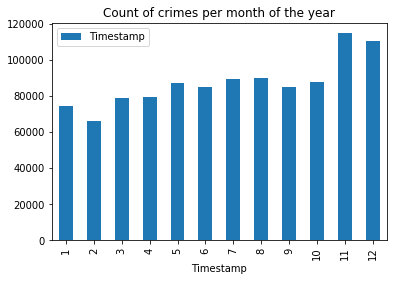

In [93]:
crimes[["Timestamp"]].groupby(crimes["Timestamp"].dt.month).count().plot(kind="bar", \
                                                                         title="Count of crimes per month of the year")

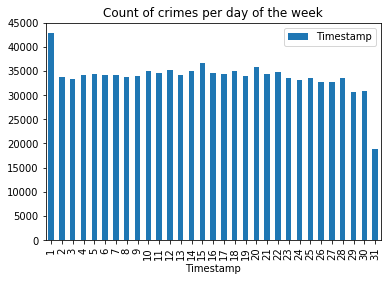

In [94]:
crimes[["Timestamp"]].groupby(crimes["Timestamp"].dt.day).count().plot(kind="bar", \
                                                                         title="Count of crimes per day of the week")

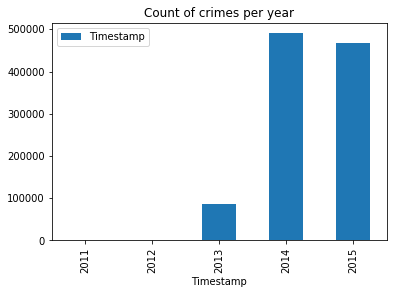

In [96]:
crimes[["Timestamp"]].groupby(crimes["Timestamp"].dt.year).count().plot(kind="bar", \
                                                                         title="Count of crimes per year")

# We should only keep data for 2014-2015...

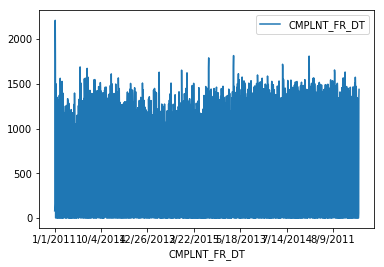

In [97]:
crimes[["CMPLNT_FR_DT"]].groupby([crimes["CMPLNT_FR_DT"]]).count().plot()
# High volatility